# Extended Phase Graph formalism

In [1]:
# PYTHON CODE
# Module imports

import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
config={'showLink': False, 'displayModeBar': False}

init_notebook_mode(connected=True)

from IPython.core.display import display, HTML

In [2]:
cd ./qMRLab
startup
cd ../EPG_code

# Single exponential decay

In [3]:
%% Single component analysis
% Input parameters
N = 32; % Echo train length (ETL)
alpha = 180; %deg
ESP = 10; % ms
T1 = 1000; % ms
T2 = 100; % ms

% Varying T2
T2 = [20:10:100,200:100:1000];
t = ESP:ESP:N*ESP;
echoes_epg_t2 = zeros(length(T2),N);
echoes_mono_t2 = echoes_epg_t2;
for ii=1:length(T2)
    [F0_vector_out,Xi_F_out,Xi_Z_out,Xi_F_all_out,Xi_Z_all_out] = cp_cpmg_epg_domain_fplus_fminus (N,alpha,ESP,T1,T2(1,ii));
    echoes_epg_t2(ii,:) = F0_vector_out;
    for jj=1:N
        echoes_mono_t2(ii,jj) = exp(-t(jj)/T2(ii));
    end
end

In [4]:
%get t --from Octave
%get T2 --from Octave
%get echoes_epg_t2 --from Octave
%get echoes_mono_t2 --from Octave

In [5]:
# Python code to generate interactive figure

init_notebook_mode(connected=True)

data1 = [dict(
        visible = False,
        line=dict(color='royalblue'),
        x = t,
        y = np.squeeze(np.asarray(echoes_mono_t2[ii,:])),
        name = 'Echo magnitude (exponential decay)',
        text = 'Echo magnitude (exponential decay)',
        hoverinfo = 'x+y+text') for ii in range(len(T2))]

data1[3]['visible'] = True

data2 = [dict(
        visible = False,
        line=dict(color='firebrick'),
        x = t,
        y = np.squeeze(np.asarray(echoes_epg_t2[ii,:])),
        name = 'Echo magnitude (EPG)',
        text = 'Echo magnitude (EPG)',
        hoverinfo = 'x+y+text') for ii in range(len(T2))]

data2[3]['visible'] = True

data = data1 + data2

steps = []
for i in range(len(T2)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data1)],
        label = str(T2[i])
        )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders=[
    dict(
        x = 0,
        y = -0.09,
        active = 3,
        currentvalue = {"prefix": "T2 value (ms): <b>"},
        pad = {"t": 50, "b": 10},
        steps = steps)]

layout = go.Layout(
    width=580,
    height=450,
    margin=go.layout.Margin(
        l=80,
        r=40,
        b=60,
        t=10,
    ),
    annotations=[
        dict(
            x=0.50,
            y=-0.18,
            showarrow=False,
            text='Echo time (ms)',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=-0.15,
            y=0.5,
            showarrow=False,
            text='Echo magnitude (a.u.)',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            textangle=-90,
            xref='paper',
            yref='paper'
        )
    ],
    xaxis=dict(
        autorange=False,
        range=[0, t[-1]],
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        autorange=True,
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    legend=dict(
        x=0.5,
        y=0.9,
        traceorder='normal',
        font=dict(
            family='Times New Roman',
            size=12,
            color='#000'
        ),
        bordercolor='#000000',
        borderwidth=2
    ), 
    sliders=sliders
)

fig = dict(data=data, layout=layout)

iplot(fig, filename = 'basic-line', config = config)


In [6]:
% Input parameters
N = 32; % Echo train length (ETL)
ESP = 10; % ms
T1 = 1000; % ms
T2 = 100; % ms

% Varying alpha
alpha = 80:5:180;
t = ESP:ESP:N*ESP;
echoes_epg_alpha = zeros(length(alpha),N);
echoes_mono_alpha = echoes_epg_alpha;
for ii=1:length(alpha)
    [F0_vector_out,Xi_F_out,Xi_Z_out,Xi_F_all_out,Xi_Z_all_out] = cp_cpmg_epg_domain_fplus_fminus (N,alpha(1,ii),ESP,T1,T2);
    echoes_epg_alpha(ii,:) = F0_vector_out;
    for jj=1:N
        echoes_mono_alpha(ii,jj) = exp(-t(jj)/T2);
    end
end

In [7]:
%get t --from Octave
%get alpha --from Octave
%get echoes_epg_alpha --from Octave
%get echoes_mono_alpha --from Octave

In [8]:
# Python code to generate interactive figure

init_notebook_mode(connected=True)

data1 = [dict(
        visible = False,
        line=dict(color='royalblue'),
        x = t,
        y = np.squeeze(np.asarray(echoes_mono_alpha[ii,:])),
        name = 'Echo magnitude (180°)',
        text = 'Echo magnitude (180°)',
        hoverinfo = 'x+y+text') for ii in range(len(alpha))]

data1[3]['visible'] = True

data2 = [dict(
        visible = False,
        line=dict(color='firebrick'),
        x = t,
        y = np.squeeze(np.asarray(echoes_epg_alpha[ii,:])),
        name = 'Echo magnitude (EPG)',
        text = 'Echo magnitude (EPG)',
        hoverinfo = 'x+y+text') for ii in range(len(alpha))]

data2[3]['visible'] = True

data = data1 + data2

steps = []
for i in range(len(alpha)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data1)],
        label = str(alpha[i])
        )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders=[
    dict(
        x = 0,
        y = -0.09,
        active = 3,
        currentvalue = {"prefix": "Refocusing angle α (°): <b>"},
        pad = {"t": 50, "b": 10},
        steps = steps)]

layout = go.Layout(
    width=580,
    height=450,
    margin=go.layout.Margin(
        l=80,
        r=40,
        b=60,
        t=10,
    ),
    annotations=[
        dict(
            x=0.50,
            y=-0.18,
            showarrow=False,
            text='Echo time (ms)',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=-0.15,
            y=0.5,
            showarrow=False,
            text='Echo magnitude (a.u.)',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            textangle=-90,
            xref='paper',
            yref='paper'
        )
    ],
    xaxis=dict(
        autorange=False,
        range=[0, t[-1]],
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        autorange=True,
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    legend=dict(
        x=0.5,
        y=0.9,
        traceorder='normal',
        font=dict(
            family='Times New Roman',
            size=12,
            color='#000'
        ),
        bordercolor='#000000',
        borderwidth=2
    ), 
    sliders=sliders
)

fig = dict(data=data, layout=layout)

iplot(fig, filename = 'basic-line', config = config)

# Multi component T2 fitting

In [ ]:
function [Smodel, Spectrum] = mwf_eq(x,Opt,T2,DecayMatrix)
            if isnumeric(x), xbu = x; x=struct; x.MWF = xbu(1); x.T2MW = xbu(2); x.T2IEW = xbu(3); end
            x.MWF = x.MWF/100;
            
            % MF (Myelin Fraction) and IEF (Intra/Extracellular Fraction)
            % with their index (index of the closest value)
            MF  = x.MWF;
            IEF = 1 - MF;
            varT2 = Opt.T2Spectrumvariance_Myelin+eps; meanT2 = x.T2MW; beta=varT2/meanT2; alpha = meanT2/beta;
            SpectrumMW = gampdf(T2.vals,alpha,beta); SpectrumMW(isnan(SpectrumMW))=0;
            SpectrumMW = SpectrumMW/sum(SpectrumMW);
            varT2 = Opt.T2Spectrumvariance_IEIntraExtracellularWater+eps; meanT2 = x.T2IEW; beta=varT2/meanT2; alpha = meanT2/beta;
            SpectrumIEW = gampdf(T2.vals,alpha,beta); SpectrumIEW(isnan(SpectrumIEW))=0;
            SpectrumIEW = SpectrumIEW/sum(SpectrumIEW);
            % Create the spectrum
            Spectrum = MF*SpectrumMW + IEF*SpectrumIEW;
            % Generate the signal
            Smodel = DecayMatrix * Spectrum;
end

In [ ]:
function Fit = FitDecayMatrix(x,T2,DecayMatrix,alpha,SNR)
    Fit = zeros(3,length(SNR),length(alpha));
    Model = mwf;
    
    for jj=1:length(SNR)
        Opt.SNR = SNR(jj);
        Opt.T2Spectrumvariance_Myelin = 5;
        Opt.T2Spectrumvariance_IEIntraExtracellularWater = 20;
        sigma = 1./Opt.SNR;
    
        for ii=1:length(alpha)
            [Smodel, Spectrum] = mwf_eq(x,Opt,T2,DecayMatrix(:,:,ii));
            data.MET2data = ricernd(Smodel,sigma);
            data.Mask = 1;
            FitResults = fit(Model,data);
            % MWF
            Fit(1,jj,ii) = FitResults.MWF;
            % T2IEW
            Fit(2,jj,ii) = FitResults.T2IEW;
            % T2MW
            Fit(3,jj,ii) = FitResults.T2MW;
        end
    end
end

### Corrected signal for non-spin echo pathways

In [ ]:
% Load qMRLab model
Model = mwf;

% Multi-component params
x = struct;
x.MWF = 50;
x.T2MW = 20;
x.T2IEW = 120;

% EchoTimes, T2 and DecayMatrix
EchoTimes   = Model.Prot.MET2data.Mat;
T2          = getT2(Model,EchoTimes);
alpha = 180
DecayMatrix = getDecayMatrix(EchoTimes,T2.vals);

In [ ]:
% Signal-to-noise ratio
SNR = [10,50,100,200];

Fit_ideal = FitDecayMatrix(SNR)Fit_ideal = FitDecayMatrix(x,T2,DecayMatrix,alpha,SNR);

### Non-corrected signal for non-spin echo pathways

In [9]:
% Input parameters
N = 32; % ETL?
ESP = 10; % ms
T1 = 1000; % ms

% Load qMRLab model
Model = mwf;

% Multi-component params
x.T2MW = 20; % ms (fast decay component)
x.MWF = 50; % 50% mwf
x.T2IEW = 120; % ms (slow decay component)

% Sequence params
alpha = 60:10:180;
t = ESP:ESP:N*ESP;
EchoTimes   = Model.Prot.MET2data.Mat;
T2          = getT2(Model,EchoTimes);
multiechoes_epg_alpha = zeros(N,length(T2.vals),length(alpha));

for ii=1:length(alpha)
    for jj=1:length(T2.vals)
        [F0_1,~,~,~,~] = cp_cpmg_epg_domain_fplus_fminus (N,alpha(1,ii),ESP,T1,T2.vals(jj));
        multiechoes_epg_alpha(:,jj,ii) = F0_1;
    end
end
DecayMatrix = multiechoes_epg_alpha;

In [ ]:
% Signal-to-noise ratio
SNR = [10,50,100,200];

Fit_stimulated_echoes = FitDecayMatrix(x,T2,DecayMatrix,alpha,SNR);

In [10]:
%get alpha --from Octave
%get Fit_ideal --from Octave
%get Fit_stimulated_echoes --from Octave

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

print(np.shape(t))
x = np.linspace(0,4,50) # Example data

def func(x, a, b, c, d):
    return a * np.exp(b * x) + c * np.exp(d * x)

y = func(x, 2.5, 1.3, 0.5, 0.5) # Example exponential data

popt, pcov = curve_fit(func,x,y,p0=(1.0,1.0,1.0,1.0))

#Parameter estimation
p1 = popt[0] # This is your a
p2 = popt[1] # This is your b
p3 = popt[2] # This is your c
p4 = popt[3] # This is your d

print(popt)

y_fitted = func(x, p1, p2, p3, p4)

plt.plot(x,y)
plt.plot(x,y_fitted)
plt.show()

[111.78823859  16.32343365 698.08626672  85.19669238 190.26720811
 485.12515098]


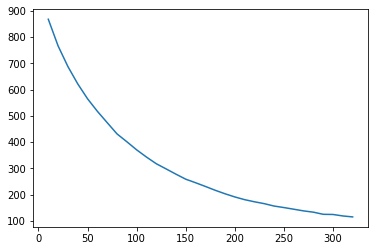

In [34]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Multiexponential function
def func(x, a, b, c, d, e, f):
    return a*np.exp(-x/b) + c*np.exp(-x/d) + e*np.exp(-x/f)

y_in = np.zeros((32,))
y_in = np.ravel(mechoes_epg_alpha_sum[12,:])
y_in += np.random.normal(size=t.size)

# Multi-component spectrum parameters
T2_1 = 20 # ms
w1 = 150 # 15%
T2_2 = 100 # ms
w2 = 750 # 75%
T2_3 = 2000 # ms
w3 = 100 # 10%

pp = func(t,w1,T2_1,w2,T2_2,w3,T2_3)
plt.plot(t,y_in)

popt, pcov = curve_fit(func,t,y_in,p0=(w1,T2_1,w2,T2_2,w3,T2_3))
print(popt)

#y[:,0] = np.array(mechoes_epg_alpha_1[12,])
#y[:,1] = np.array(mechoes_epg_alpha_2[12,])
#y[:,2] = np.array(mechoes_epg_alpha_3[12,])
#y = np.ravel(y) # Example exponential data



In [ ]:
[F0_vector_out,Xi_F_out,Xi_Z_out,Xi_F_all_out,Xi_Z_all_out] = cp_cpmg_epg_domain_fplus_fminus (N_in,alpha_in,ESP_in,T1_in,T2_in);

In [ ]:
pwd